In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict
from datetime import datetime
from datetime import timedelta

In [2]:
data = pd.read_excel("Retail.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [3]:
df1 = data["Year 2009-2010"]
df2 = data["Year 2010-2011"]

In [4]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [5]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [6]:
df = pd.concat([df1, df2])

In [7]:
df.shape

(1067371, 8)

In [8]:
df=df.sort_values(by = 'InvoiceDate').reset_index(drop = True)

In [9]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
1067367,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
1067368,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067369,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


In [10]:
# Get unique Countries
unique_values = df['Country'].unique()
value_counts = df['Country'].value_counts()
# Get the total number of unique countries
total_countries = len(unique_values)
# Print the total number of countries
print("Total number of unique countries:", total_countries)
print(unique_values)
print(value_counts)

Total number of unique countries: 43
['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'European Community']
Country
United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finla

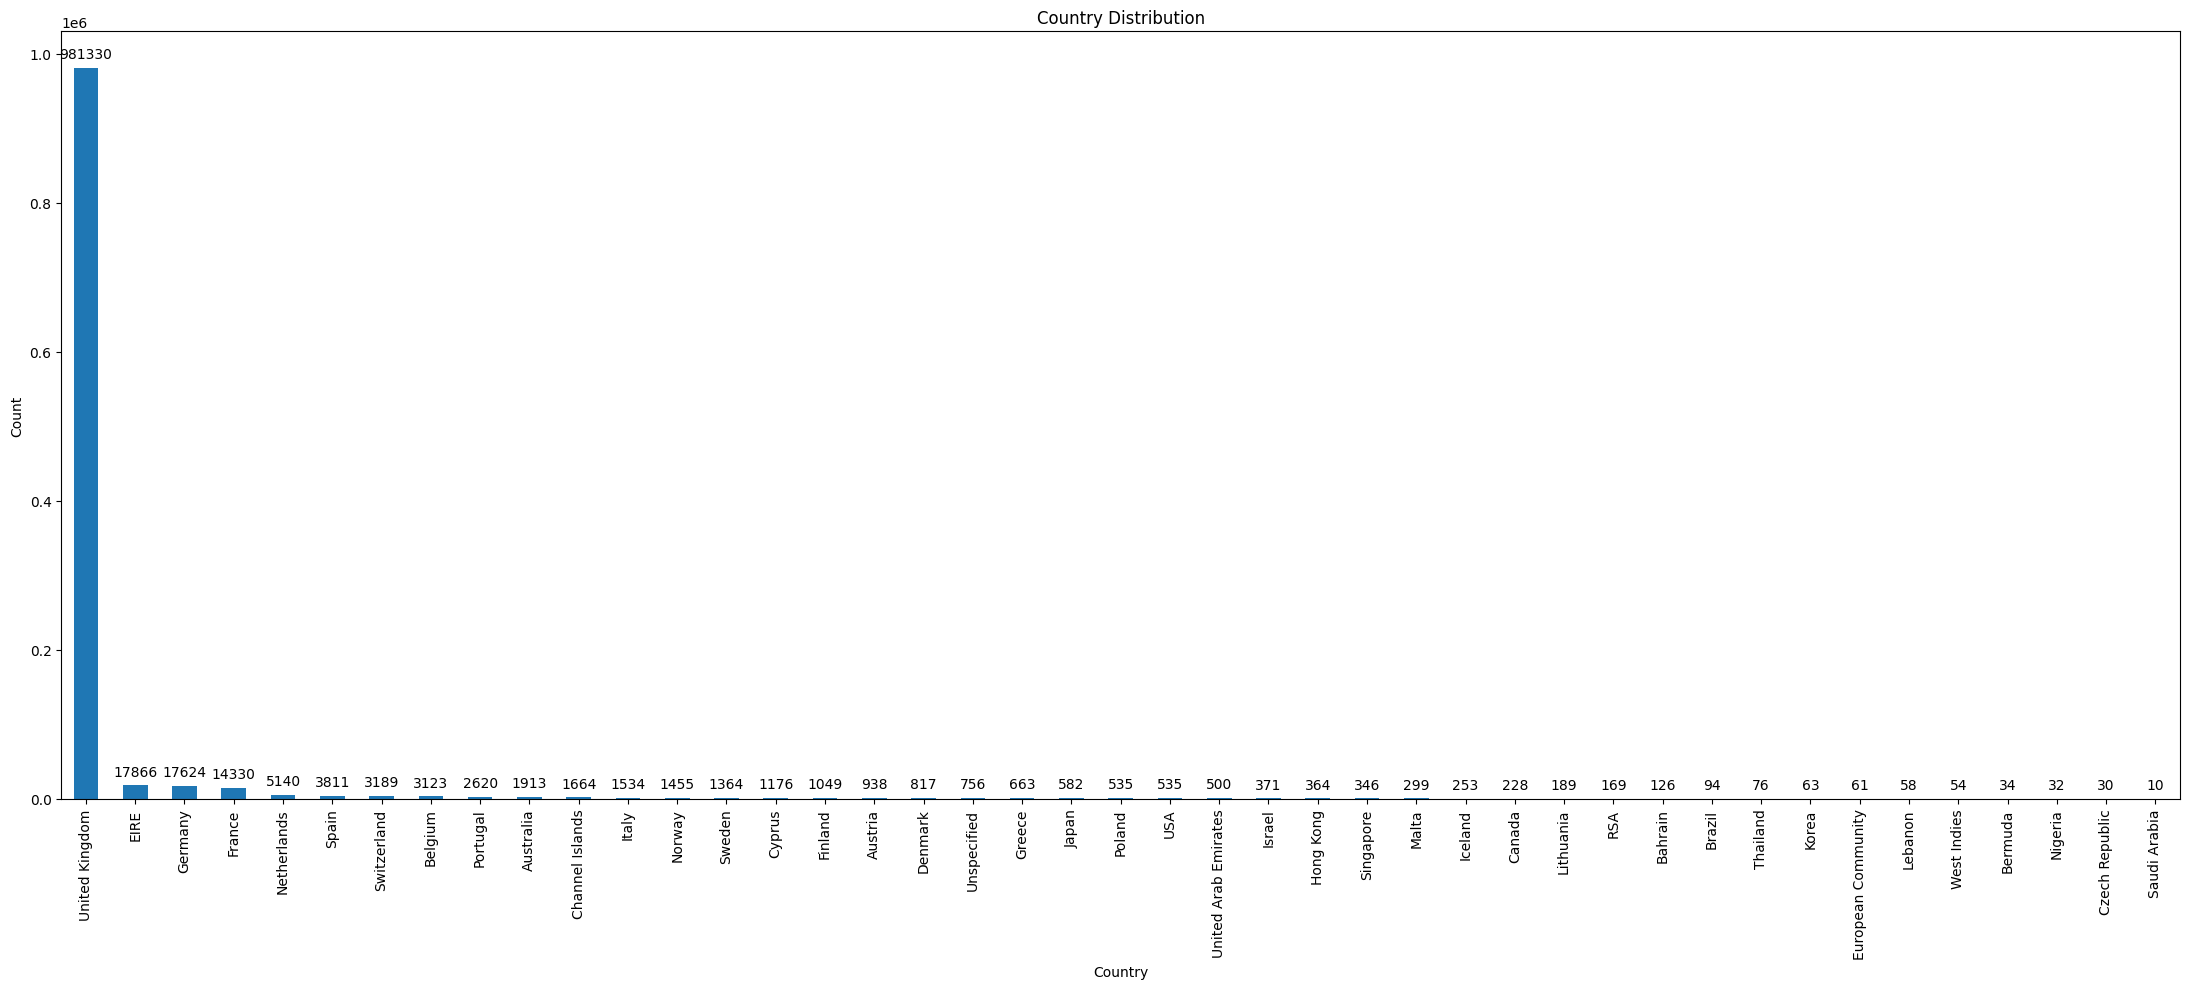

In [11]:
# Create a bar plot for the value counts of countries
plt.figure(figsize=(22, 10))  # Adjust the figure size as needed
ax = value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

In [12]:
print('The number of duplicate data records: ', df.sort_values(by = 'InvoiceDate').duplicated().sum())

The number of duplicate data records:  34335


In [13]:
# visually inspect some of the duplicated rows
duplicated = df[df.duplicated(keep = False)].sort_values(by = ['InvoiceDate','Invoice','StockCode'])
duplicated

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
370,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
398,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
366,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
385,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
373,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067153,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,2011-12-09 11:34:00,1.25,14446.0,United Kingdom
1067119,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067152,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067099,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446.0,United Kingdom


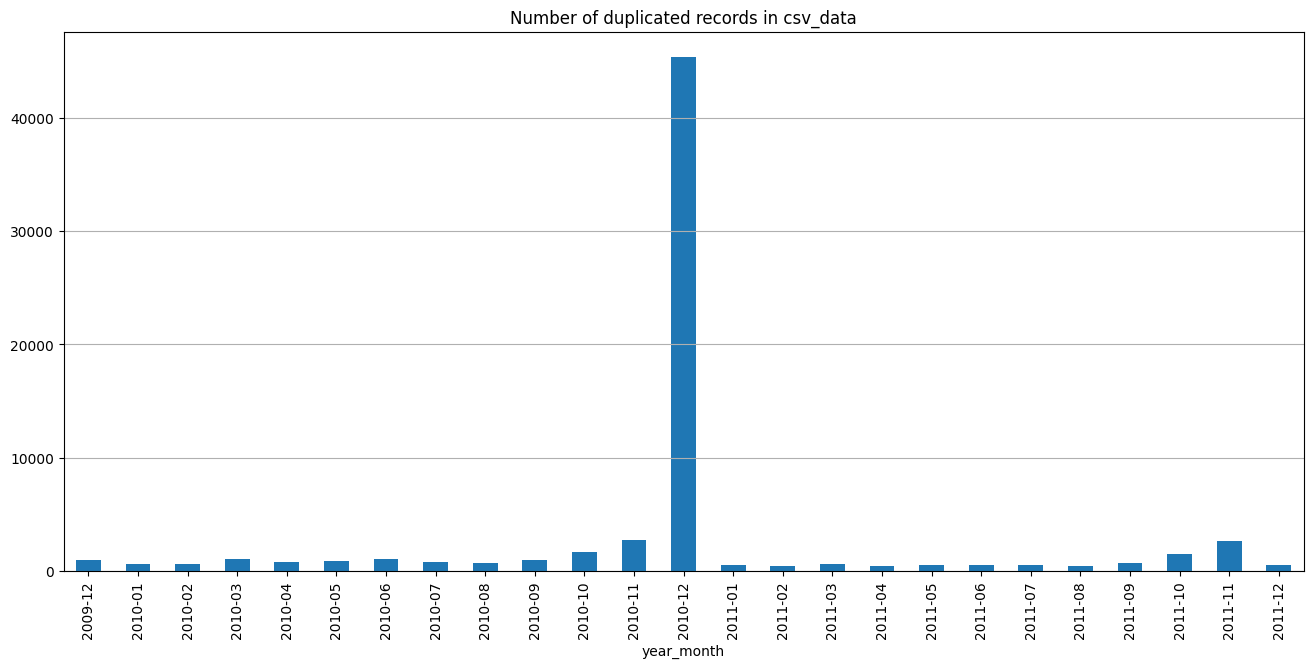

In [14]:
# Add year_month column to duplicated data
duplicated['year_month'] = duplicated['InvoiceDate'].dt.strftime('%Y-%m')

# Plot the number of duplicated records by year and month
plt.figure(figsize=(16,7))
duplicated['year_month'].value_counts(sort=False).plot.bar()
plt.title('Number of duplicated records in csv_data')
plt.grid(which='major', axis='y')
plt.show()


In [15]:
# There is an overlap in dates in the dataset, one reason for duplicates
df1_maxDate = df1['InvoiceDate'].max() # last date in first part of dataset
df2_minDate = df2['InvoiceDate'].min() # start date of the second part of the dataset
print('Final date in part1 of the dataset', df1_maxDate)
print('Start date of part2 of the dataset', df2_minDate)

Final date in part1 of the dataset 2010-12-09 20:01:00
Start date of part2 of the dataset 2010-12-01 08:26:00


In [16]:
# Solution to overlap
df = pd.concat(
    [df1[df1['InvoiceDate'] < df2_minDate],
     df2
    ])
df.shape

(1044848, 8)

In [17]:
print('The number of duplicate data records: ', df.sort_values(by = 'InvoiceDate').duplicated().sum())

The number of duplicate data records:  11812


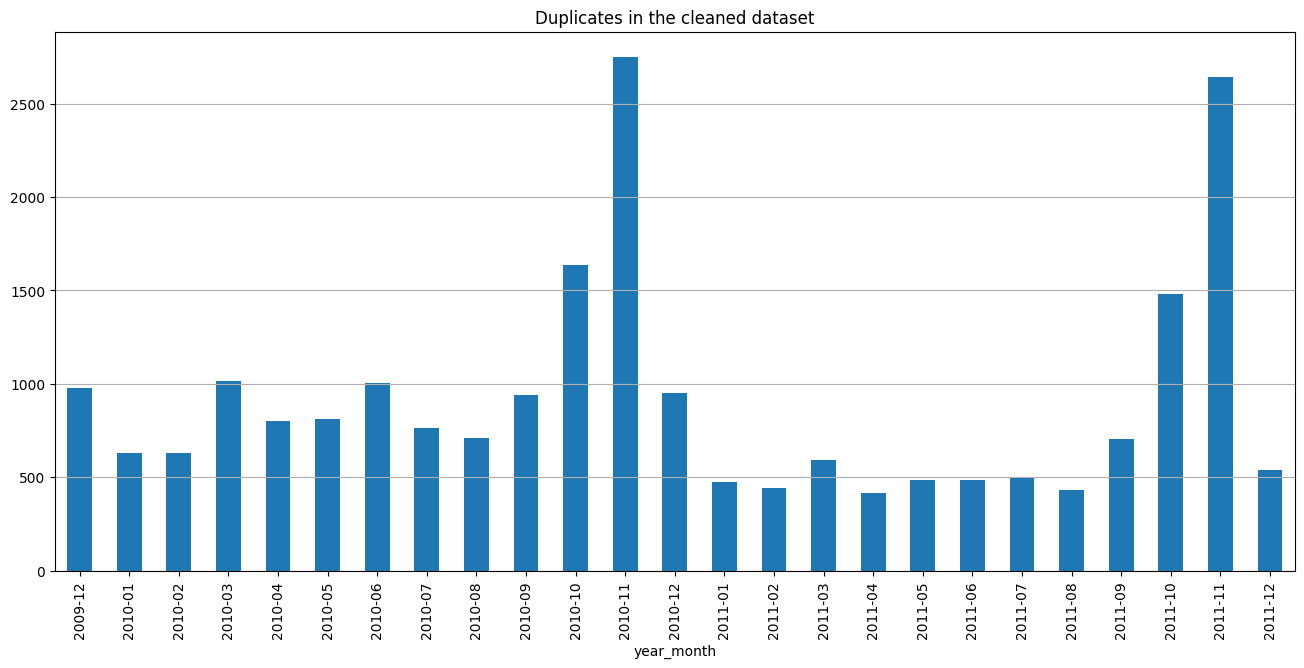

In [18]:
# New duplicated data graph
duplicated_df = df[df.duplicated(keep = False)].sort_values(by = ['InvoiceDate','Invoice','StockCode'])
# add year_month column to duplicated data
duplicated_df['year_month'] = duplicated_df['InvoiceDate'].dt.to_period('M')
plt.figure(figsize=(16,7))
duplicated_df['year_month'].value_counts(sort = False).plot.bar()
plt.title('Duplicates in the cleaned dataset')
plt.grid(which = 'major', axis = 'y')
plt.show()

In [19]:
# These are adjusted rows by someone to tally the data ith no Customer ID
# Extract rows where Invoice starts with 'A'
invoice_a_df = df[df['Invoice'].str.startswith('A', na=False)]

# Display the resulting DataFrame
invoice_a_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [20]:
# These are cancelled/returned orders
# Extract rows where Invoice starts with 'C'
invoice_c_negdf = df[df['Invoice'].str.startswith('C', na=False)]

# Display the resulting DataFrame
invoice_c_negdf


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [21]:
# Canceled order with positive quantity rather than negative like in previous code line
df[(df['Quantity'] > 0) & (df['Invoice'].str.contains('C', na = False))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom


In [22]:
df[df['Customer ID'] == 12346].tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
255595,C514024,M,Manual,-1,2010-06-30 11:22:00,142.31,12346.0,United Kingdom
370048,C525099,D,Discount,-1,2010-10-04 09:54:00,1.00,12346.0,United Kingdom
371779,C525274,TEST001,This is a test product.,-1,2010-10-04 16:33:00,4.50,12346.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


In [23]:
print('The number of entries with negative quantinty', df[(df['Quantity'] < 0)].shape[0])

The number of entries with negative quantinty 22557


In [24]:
# Extract rows with NaN values into a new DataFrame
nan_df = df[df.isna().any(axis=1)]

# Display the DataFrame with NaN values
nan_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [25]:
# Get unique values of a column
unique_values = nan_df['Country'].unique()
value_counts = nan_df['Country'].value_counts()
# Get the total number of unique countries for nan customer ID
total_countries = len(unique_values)
# Print the total number of countries
print("Total number of unique countries:", total_countries)
print(unique_values)
print(value_counts)

Total number of unique countries: 15
['United Kingdom' 'Nigeria' 'EIRE' 'Bahrain' 'United Arab Emirates'
 'Bermuda' 'Sweden' 'France' 'Hong Kong' 'Lebanon' 'RSA' 'Unspecified'
 'Portugal' 'Israel' 'Switzerland']
Country
United Kingdom          232320
EIRE                      1660
Hong Kong                  364
Unspecified                232
France                     128
Switzerland                125
Portugal                   116
United Arab Emirates       114
Bahrain                     67
Israel                      47
RSA                         46
Bermuda                     34
Sweden                      19
Lebanon                     13
Nigeria                      2
Name: count, dtype: int64


In [26]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235287
Country             0
dtype: int64

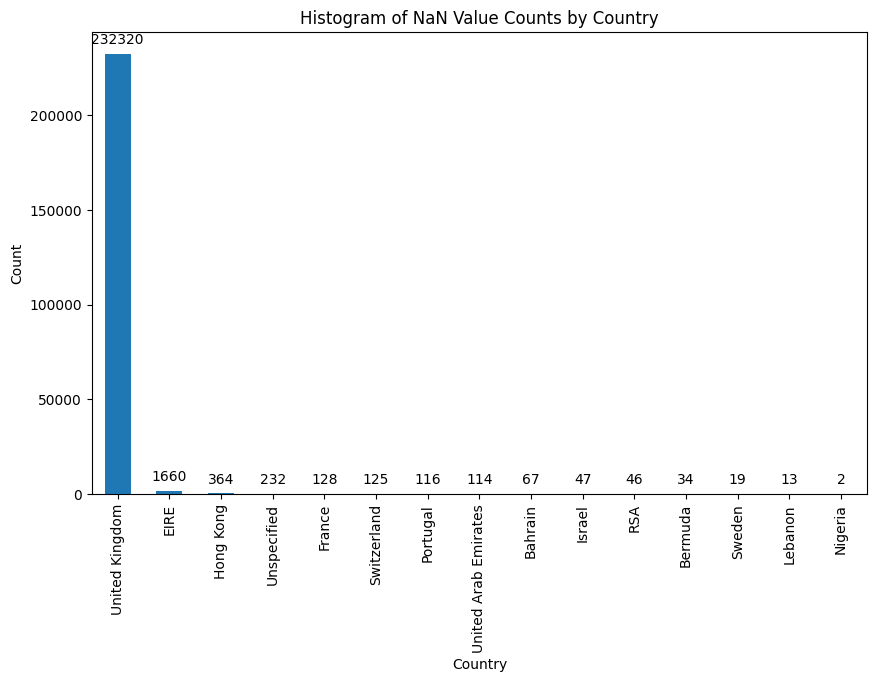

In [27]:
# Get the value counts of the 'Country' column from the DataFrame with NaN values
value_counts = nan_df['Country'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Country')

plt.ylabel('Count')
plt.title('Histogram of NaN Value Counts by Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [28]:
# Extract rows where StockCode starts with 'B'
invoice_sa_df = df[df['StockCode'].str.startswith('B', na=False)]

# Display the resulting DataFrame
invoice_sa_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.0,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.0,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.0,United Kingdom
...,...,...,...,...,...,...,...,...
440745,574546,BANK CHARGES,Bank Charges,1,2011-11-04 14:59:00,15.00,13651.0,United Kingdom
481152,C577342,BANK CHARGES,Bank Charges,-1,2011-11-18 15:11:00,490.06,NaN,United Kingdom
481153,C577343,BANK CHARGES,Bank Charges,-1,2011-11-18 15:13:00,27.21,NaN,United Kingdom
506357,579137,BANK CHARGES,Bank Charges,1,2011-11-28 12:51:00,15.00,14704.0,United Kingdom


In [29]:
# Customer with only negative quantity and no purchase history
df[df['Customer ID'] == 16703].tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.0,16703.0,United Kingdom


In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [31]:
# Group by Customer ID and filter customers with negative quantities
negative_quantity_df = df[df['Quantity'] < 0]

negative_quantity_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [32]:
# Check if customers with negative quantities have no positive quantity values in their history
customers_with_no_positive_history = negative_quantity_df[
    ~negative_quantity_df['Customer ID'].isin(df[df['Quantity'] > 0]['Customer ID'])
]

# Display the resulting DataFrame
customers_with_no_positive_history

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1134,C489551,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 12:35:00,6.95,17641.0,United Kingdom
2724,C489610,21364,PEACE SMALL WOOD LETTERS,-1,2009-12-01 14:52:00,6.75,17485.0,United Kingdom
2725,C489610,22164,STRING OF STARS CARD HOLDER,-1,2009-12-01 14:52:00,2.95,17485.0,United Kingdom
2726,C489610,21892,TRADITIONAL WOODEN CATCH CUP GAME,-3,2009-12-01 14:52:00,1.25,17485.0,United Kingdom
2727,C489610,20682,RED SPOTTY CHILDS UMBRELLA,-1,2009-12-01 14:52:00,3.25,17485.0,United Kingdom
...,...,...,...,...,...,...,...,...
394911,C527332,M,Manual,-1,2010-10-15 15:25:00,530.31,14781.0,United Kingdom
462994,C533099,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,-1,2010-11-16 11:14:00,9.95,13353.0,United Kingdom
462995,C533099,21843,RED RETROSPOT CAKE STAND,-1,2010-11-16 11:14:00,10.95,13353.0,United Kingdom
462996,C533099,22840,ROUND CAKE TIN VINTAGE RED,-1,2010-11-16 11:14:00,7.95,13353.0,United Kingdom


In [33]:
# Get unique customer IDs in customers_with_no_positive_history
unique_customers = customers_with_no_positive_history['Customer ID'].unique()


In [34]:
len(unique_customers)

61

In [35]:
customers_with_no_positive_history[customers_with_no_positive_history['Customer ID'] == 12346].tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044848 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044848 non-null  object        
 1   StockCode    1044848 non-null  object        
 2   Description  1040573 non-null  object        
 3   Quantity     1044848 non-null  int64         
 4   InvoiceDate  1044848 non-null  datetime64[ns]
 5   Price        1044848 non-null  float64       
 6   Customer ID  809561 non-null   float64       
 7   Country      1044848 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 71.7+ MB


In [37]:
df_l = df.dropna(subset=["Customer ID"])
df_l

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [38]:
# Check if customers with negative quantities have no positive quantity values in their history
customers_with_no_positive_history = df_l[
    ~df_l['Customer ID'].isin(df_l[df_l['Quantity'] > 0]['Customer ID'])
]

# Display the resulting DataFrame
customers_with_no_positive_history

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1134,C489551,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 12:35:00,6.95,17641.0,United Kingdom
2724,C489610,21364,PEACE SMALL WOOD LETTERS,-1,2009-12-01 14:52:00,6.75,17485.0,United Kingdom
2725,C489610,22164,STRING OF STARS CARD HOLDER,-1,2009-12-01 14:52:00,2.95,17485.0,United Kingdom
2726,C489610,21892,TRADITIONAL WOODEN CATCH CUP GAME,-3,2009-12-01 14:52:00,1.25,17485.0,United Kingdom
2727,C489610,20682,RED SPOTTY CHILDS UMBRELLA,-1,2009-12-01 14:52:00,3.25,17485.0,United Kingdom
...,...,...,...,...,...,...,...,...
394911,C527332,M,Manual,-1,2010-10-15 15:25:00,530.31,14781.0,United Kingdom
462994,C533099,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,-1,2010-11-16 11:14:00,9.95,13353.0,United Kingdom
462995,C533099,21843,RED RETROSPOT CAKE STAND,-1,2010-11-16 11:14:00,10.95,13353.0,United Kingdom
462996,C533099,22840,ROUND CAKE TIN VINTAGE RED,-1,2010-11-16 11:14:00,7.95,13353.0,United Kingdom


In [39]:
customers_with_no_positive_history[customers_with_no_positive_history['Quantity']>0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [40]:
customers_with_no_positive_history[customers_with_no_positive_history['Customer ID'] == 17641]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1134,C489551,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 12:35:00,6.95,17641.0,United Kingdom


In [41]:
df_l[df_l['Customer ID'] == 17641]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1134,C489551,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 12:35:00,6.95,17641.0,United Kingdom


In [42]:
df_l.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [43]:
# Filter out customers with no positive history from df_l
df_l_clean = df_l[~df_l['Customer ID'].isin(customers_with_no_positive_history['Customer ID'])]

In [44]:
# Display the cleaned DataFrame
df_l_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [45]:
df_final = df_l_clean.copy()

In [46]:
df_final

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [47]:
df_final[df_final['Customer ID'] == 17641]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


The number of duplicate data records:  11676


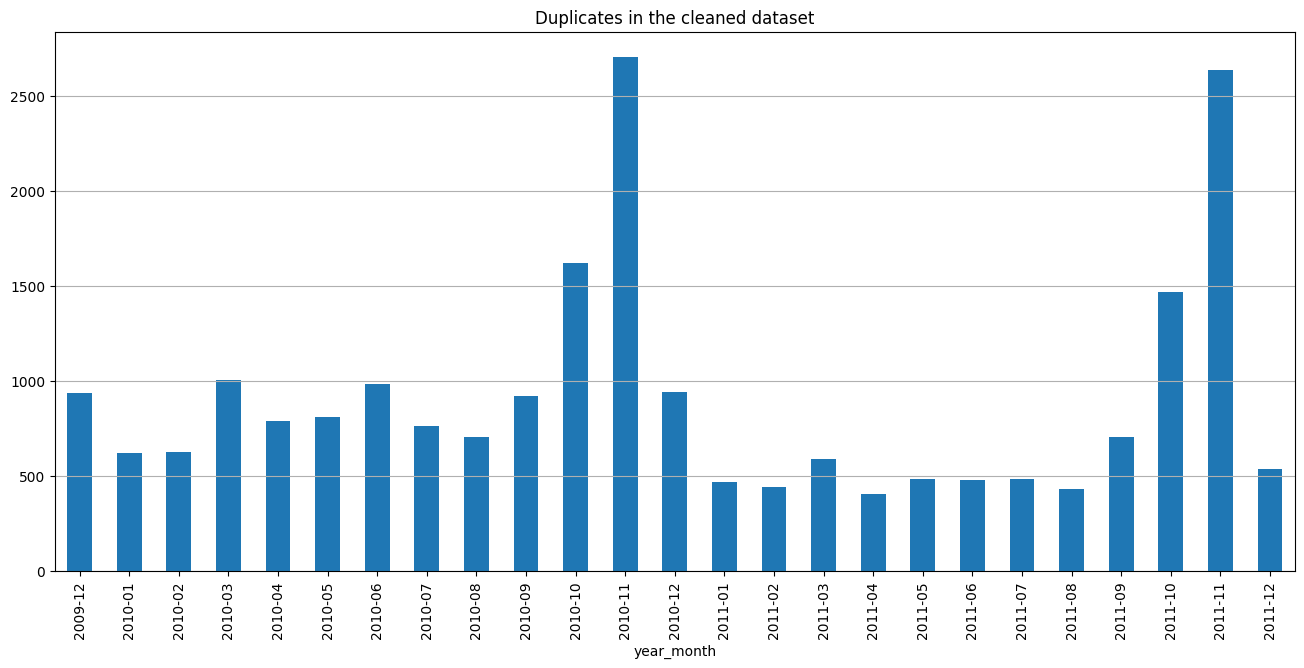

In [48]:
# Duplicates in Final
print('The number of duplicate data records: ', df_final.sort_values(by = 'InvoiceDate').duplicated().sum())
duplicated_df = df_final[df_final.duplicated(keep = False)].sort_values(by = ['InvoiceDate','Invoice','StockCode'])
# add year_month column to duplicated data
duplicated_df['year_month'] = duplicated_df['InvoiceDate'].dt.to_period('M')
plt.figure(figsize=(16,7))
duplicated_df['year_month'].value_counts(sort = False).plot.bar()
plt.title('Duplicates in the cleaned dataset')
plt.grid(which = 'major', axis = 'y')
plt.show()

In [49]:
df_final[df_final['StockCode'].str.startswith('B', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.000,16805.0,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.000,16928.0,United Kingdom
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.000,17539.0,United Kingdom
149063,C503571,BANK CHARGES,Bank Charges,-1,2010-04-01 15:45:00,15.000,17539.0,United Kingdom
153573,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.000,12843.0,United Kingdom
167424,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.000,17448.0,United Kingdom
206572,509375,BANK CHARGES,Bank Charges,1,2010-05-21 14:40:00,15.000,17448.0,United Kingdom
210149,509669,BANK CHARGES,Bank Charges,1,2010-05-25 12:03:00,15.000,17448.0,United Kingdom
231102,511774,BANK CHARGES,Bank Charges,1,2010-06-10 12:16:00,15.000,17032.0,United Kingdom
240612,512658,BANK CHARGES,Bank Charges,1,2010-06-17 11:24:00,15.000,14085.0,United Kingdom


In [50]:
customer  = df_final[df_final['Customer ID'] == 16805]

In [51]:
customer[customer['StockCode'].str.startswith('B', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.0,16805.0,United Kingdom


In [52]:
df_final[df_final['StockCode'].str.startswith('T', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom
89084,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.0,14103.0,United Kingdom


In [53]:
# Get unique values of 'StockCode'
unique_stockcodes = df_final['StockCode'].unique()

# Get unique values of 'Description'
unique_descriptions = df_final['Description'].unique()

In [54]:
# Ensure that 'Invoice' is a string before applying the lambda function
df_final['Invoice'] = df_final['Invoice'].astype(str)

# Get unique types of 'Invoice' (for example, if invoices start with different letters like 'A', 'C', etc.)
unique_invoice_types = df_final['Invoice'].apply(lambda x: x[0]).unique()

# Convert the 'Invoice' column back to object type
df_final['Invoice'] = df_final['Invoice'].astype(object)

In [55]:
len(unique_stockcodes)

4643

In [56]:
len(unique_descriptions)

5296

In [57]:
len(unique_invoice_types)

3

In [58]:
print(unique_invoice_types)

['4' 'C' '5']


In [59]:
# Convert unique_descriptions to a DataFrame for easier viewing
unique_descriptions_df = pd.DataFrame(unique_descriptions, columns=['Description'])

# Set the display option to show all rows
#pd.set_option('display.max_rows', None)

# Display the DataFrame
unique_descriptions_df

,Description
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,PINK CHERRY LIGHTS
2,WHITE CHERRY LIGHTS
3,"RECORD FRAME 7"" SINGLE SIZE"
4,STRAWBERRY CERAMIC TRINKET BOX
...,...
5291,GIN AND TONIC DIET METAL SIGN
5292,SET OF 6 RIBBONS PARTY
5293,SILVER AND BLACK ORBIT NECKLACE
5294,CREAM HANGING HEART T-LIGHT HOLDER


In [60]:
df_final[df_final["Description"] == "Discount"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.0,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.0,United Kingdom
39127,C492693,D,Discount,-1,2009-12-17 18:47:00,6.85,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [61]:
df_final[(df_final["Description"] == "Discount") & (df_final["Quantity"] > 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
160443,504700,D,Discount,1,2010-04-15 18:08:00,57.63,17032.0,United Kingdom
212633,509979,D,Discount,1,2010-05-26 14:07:00,101.99,12843.0,United Kingdom
312285,519808,D,Discount,192,2010-08-20 12:50:00,1.00,16422.0,United Kingdom
494226,535657,D,Discount,1,2010-11-28 11:20:00,13.98,14527.0,United Kingdom
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.0,United Kingdom


In [62]:
df_final[(df_final["Description"] == "Discount") & (~df_final["Invoice"].str.contains('C', na=False))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
160443,504700,D,Discount,1,2010-04-15 18:08:00,57.63,17032.0,United Kingdom
212633,509979,D,Discount,1,2010-05-26 14:07:00,101.99,12843.0,United Kingdom
312285,519808,D,Discount,192,2010-08-20 12:50:00,1.00,16422.0,United Kingdom
494226,535657,D,Discount,1,2010-11-28 11:20:00,13.98,14527.0,United Kingdom
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.0,United Kingdom


In [63]:
df_final[(df_final['Customer ID'] == 16422)&(df_final["Description"]=="Discount")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
285954,C517231,D,Discount,-120,2010-07-27 13:34:00,0.27,16422.0,United Kingdom
286414,C517262,D,Discount,-1,2010-07-27 17:22:00,6.00,16422.0,United Kingdom
312284,C519807,D,Discount,-192,2010-08-20 12:48:00,1.00,16422.0,United Kingdom
312285,519808,D,Discount,192,2010-08-20 12:50:00,1.00,16422.0,United Kingdom
312286,C519809,D,Discount,-192,2010-08-20 12:51:00,0.01,16422.0,United Kingdom
386471,C526537,D,Discount,-1,2010-10-12 11:29:00,3.39,16422.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
31135,C538897,D,Discount,-1,2010-12-15 09:14:00,42.50,16422.0,United Kingdom
108088,C545478,D,Discount,-720,2011-03-03 11:08:00,0.01,16422.0,United Kingdom
320704,C565078,D,Discount,-1,2011-08-31 17:45:00,57.60,16422.0,United Kingdom


In [64]:
df_final[df_final["Invoice"]=="C526537"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
386471,C526537,D,Discount,-1,2010-10-12 11:29:00,3.39,16422.0,United Kingdom


In [65]:
#pd.reset_option('display.max_rows')
df_final[df_final['Customer ID'] == 16422]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1760,C489587,21639,ASSORTED TUTTI FRUTTI KEYRING,-5,2009-12-01 13:52:00,0.85,16422.0,United Kingdom
52785,494216,17003,BROCADE RING PURSE,720,2010-01-12 11:57:00,0.21,16422.0,United Kingdom
52786,494216,20975,12 PENCILS SMALL TUBE RED SPOTTY,96,2010-01-12 11:57:00,0.65,16422.0,United Kingdom
52787,494216,47590B,PINK HAPPY BIRTHDAY BUNTING,50,2010-01-12 11:57:00,4.65,16422.0,United Kingdom
67035,495359,20676,RED SPOTTY BOWL,72,2010-01-24 11:58:00,1.06,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
489993,578035,20975,12 PENCILS SMALL TUBE RED RETROSPOT,24,2011-11-22 14:00:00,0.65,16422.0,United Kingdom
489994,578035,21326,AGED GLASS SILVER T-LIGHT HOLDER,96,2011-11-22 14:00:00,0.65,16422.0,United Kingdom
489995,578035,22152,PLACE SETTING WHITE STAR,192,2011-11-22 14:00:00,0.42,16422.0,United Kingdom
489996,578035,22333,RETROSPOT PARTY BAG + STICKER SET,48,2011-11-22 14:00:00,1.45,16422.0,United Kingdom


In [66]:
df_final[df_final["Description"]=="Manual"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [67]:
df_final[(df_final["Customer ID"]==15482)&(df_final["Description"]=="Manual")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
397313,571179,M,Manual,1,2011-10-14 10:42:00,40.00,15482.0,United Kingdom


In [68]:
df_final[(df_final["Description"]=="Manual")&(df_final["Quantity"]<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
17273,C490748,M,Manual,-1,2009-12-07 18:14:00,309.73,12748.0,United Kingdom
22772,C491157,M,Manual,-1,2009-12-10 10:00:00,40.00,14942.0,United Kingdom
...,...,...,...,...,...,...,...,...
520134,C580263,M,Manual,-16,2011-12-02 12:43:00,0.29,12536.0,France
523375,C580510,M,Manual,-1,2011-12-04 13:48:00,1.25,14456.0,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom


In [69]:
df_final[(df_final["Description"]=="Manual")&(df_final["Quantity"]>0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231.0,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.0,United Kingdom
17887,490881,M,Manual,1,2009-12-08 12:58:00,10.00,16210.0,United Kingdom
...,...,...,...,...,...,...,...,...
526015,580645,M,Manual,1,2011-12-05 13:11:00,219.50,17857.0,United Kingdom
526018,580646,M,Manual,800,2011-12-05 13:13:00,0.25,17857.0,United Kingdom
530876,580884,M,Manual,1,2011-12-06 12:21:00,0.85,15907.0,United Kingdom
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom


In [70]:
df_final[df_final["Invoice"]=="490300"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
11293,490300,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2009-12-04 14:19:00,1.95,12970.0,United Kingdom
11294,490300,21726,MULTI HEARTS STICKERS,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11295,490300,21726,MULTI HEARTS STICKERS,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11296,490300,21726,MULTI HEARTS STICKERS,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11297,490300,21725,SWEETIES STICKERS,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
...,...,...,...,...,...,...,...,...
11383,490300,21724,PANDA AND BUNNIES STICKER SHEET,2,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11384,490300,84691,PACK 20 DOLLY PEGS,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11385,490300,21723,ALPHABET HEARTS STICKER SHEET,2,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11386,490300,21590,KINGS CHOICE CIGAR BOX MATCHES,1,2009-12-04 14:19:00,1.25,12970.0,United Kingdom


In [71]:
len(df_final[df_final["Description"].str.startswith("Bank Charges", na=False)])

33

In [72]:
df_final[df_final["Description"].str.startswith("Bank Charges", na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.000,17539.0,United Kingdom
149063,C503571,BANK CHARGES,Bank Charges,-1,2010-04-01 15:45:00,15.000,17539.0,United Kingdom
153573,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.000,12843.0,United Kingdom
167424,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.000,17448.0,United Kingdom
206572,509375,BANK CHARGES,Bank Charges,1,2010-05-21 14:40:00,15.000,17448.0,United Kingdom
210149,509669,BANK CHARGES,Bank Charges,1,2010-05-25 12:03:00,15.000,17448.0,United Kingdom
231102,511774,BANK CHARGES,Bank Charges,1,2010-06-10 12:16:00,15.000,17032.0,United Kingdom
240612,512658,BANK CHARGES,Bank Charges,1,2010-06-17 11:24:00,15.000,14085.0,United Kingdom
272460,515845,BANK CHARGES,Bank Charges,1,2010-07-15 11:21:00,15.000,14606.0,United Kingdom
272462,515855,BANK CHARGES,Bank Charges,1,2010-07-15 11:24:00,15.000,17448.0,United Kingdom


In [73]:
df_final[df_final["Customer ID"]==17539]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27005,491683,22217,T-LIGHT HOLDER HANGING LACE,3,2009-12-13 12:36:00,1.25,17539.0,United Kingdom
27006,491683,21588,RETRO SPOT GIANT TUBE MATCHES,1,2009-12-13 12:36:00,2.55,17539.0,United Kingdom
27007,491683,21584,RETRO SPOT SMALL TUBE MATCHES,3,2009-12-13 12:36:00,1.65,17539.0,United Kingdom
27008,491683,84997B,RED 3 PIECE MINI DOTS CUTLERY SET,2,2009-12-13 12:36:00,3.75,17539.0,United Kingdom
27009,491683,21590,KINGS CHOICE CIGAR BOX MATCHES,1,2009-12-13 12:36:00,1.25,17539.0,United Kingdom
...,...,...,...,...,...,...,...,...
132001,501897,22243,"HOOK, 5 HANGER ,MAGIC TOADSTOOL RED",4,2010-03-21 15:23:00,1.65,17539.0,United Kingdom
132002,501897,22236,CAKE STAND 3 TIER MAGIC GARDEN,2,2010-03-21 15:23:00,12.75,17539.0,United Kingdom
133770,C502092,21658,GLASS BEURRE DISH,-10,2010-03-22 16:50:00,3.95,17539.0,United Kingdom
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.00,17539.0,United Kingdom


In [74]:
df_final[df_final["Description"]=="This is a test product."]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom
89084,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.0,14103.0,United Kingdom


In [75]:
df_final[df_final["Description"].str.contains("Adjustment",na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE
70980,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.0,Spain
70982,C495738,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,26.25,12454.0,Spain
70985,495742,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:25:00,63.24,12404.0,Finland
70986,C495741,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:25:00,13.14,16840.0,United Kingdom
71022,495745,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,56.73,12466.0,France
71023,495748,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,117.72,16291.0,Portugal
71033,495747,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:26:00,129.23,12555.0,Spain


In [76]:
#pd.reset_option("display.max_rows")
df_final[df_final["Description"].str.contains("Next",na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
205748,554835,23444,Next Day Carriage,1,2011-05-26 16:11:00,15.0,15241.0,United Kingdom
209588,555251,23444,Next Day Carriage,1,2011-06-01 15:12:00,15.0,13062.0,United Kingdom
210691,555312,23444,Next Day Carriage,1,2011-06-02 10:39:00,15.0,16484.0,United Kingdom
211341,555367,23444,Next Day Carriage,1,2011-06-02 14:28:00,15.0,17900.0,United Kingdom
218011,555948,23444,Next Day Carriage,1,2011-06-08 10:49:00,30.0,13752.0,United Kingdom
...,...,...,...,...,...,...,...,...
525425,580622,23444,Next Day Carriage,1,2011-12-05 12:09:00,15.0,17006.0,United Kingdom
525438,580630,23444,Next Day Carriage,1,2011-12-05 12:11:00,15.0,12913.0,United Kingdom
534091,581132,23444,Next Day Carriage,1,2011-12-07 12:55:00,15.0,17590.0,United Kingdom
536863,581221,23444,Next Day Carriage,1,2011-12-08 09:40:00,15.0,17856.0,United Kingdom


In [77]:
df_final[(df_final["Description"].str.contains("Next Day Carriage",na=False))&(df_final["Quantity"]<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
252022,C559059,23444,Next Day Carriage,-1,2011-07-06 10:00:00,15.0,13338.0,United Kingdom


In [78]:
df_final[df_final["Invoice"]=="554835"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
205735,554835,22406,MONEY BOX KINGS CHOICE DESIGN,12,2011-05-26 16:11:00,1.25,15241.0,United Kingdom
205736,554835,20754,RETROSPOT RED WASHING UP GLOVES,6,2011-05-26 16:11:00,2.10,15241.0,United Kingdom
205737,554835,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",4,2011-05-26 16:11:00,4.95,15241.0,United Kingdom
205738,554835,21217,RED RETROSPOT ROUND CAKE TINS,1,2011-05-26 16:11:00,9.95,15241.0,United Kingdom
205739,554835,21154,RED RETROSPOT OVEN GLOVE,10,2011-05-26 16:11:00,1.25,15241.0,United Kingdom
205740,554835,21535,RED RETROSPOT SMALL MILK JUG,6,2011-05-26 16:11:00,2.55,15241.0,United Kingdom
205741,554835,21875,KINGS CHOICE MUG,12,2011-05-26 16:11:00,1.25,15241.0,United Kingdom
205742,554835,21394,RED POLKADOT BEAKER,48,2011-05-26 16:11:00,0.39,15241.0,United Kingdom
205743,554835,37370,RETRO COFFEE MUGS ASSORTED,12,2011-05-26 16:11:00,1.25,15241.0,United Kingdom
205744,554835,47518F,ICON PLACEMAT POP ART ELVIS,24,2011-05-26 16:11:00,0.12,15241.0,United Kingdom


In [79]:

df_final[(df_final["Customer ID"]==13338)&(df_final["Description"].str.contains("Carriage",na=False))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
249750,558908,23444,Next Day Carriage,1,2011-07-05 09:06:00,15.0,13338.0,United Kingdom
252022,C559059,23444,Next Day Carriage,-1,2011-07-06 10:00:00,15.0,13338.0,United Kingdom


In [80]:
df_final[df_final["Description"].str.contains("CRUK",na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom
324003,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom
333745,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom
338812,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom
350582,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom
361589,C568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom
372785,C569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom
389964,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom
401767,C571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom
416112,C572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,United Kingdom


In [81]:
pd.reset_option('display.max_rows')
df_final[df_final["Customer ID"]==14096]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
317502,564764,16207B,PINK HEART RED HANDBAG,1,2011-08-30 10:49:00,2.46,14096.0,United Kingdom
317503,564764,16225,RATTLE SNAKE EGGS,1,2011-08-30 10:49:00,3.29,14096.0,United Kingdom
317504,564764,16254,TRANSPARENT ACRYLIC TAPE DISPENSER,1,2011-08-30 10:49:00,1.63,14096.0,United Kingdom
317505,564764,84249A,"GREETING CARD,SQUARE, DOUGHNUTS",1,2011-08-30 10:49:00,0.83,14096.0,United Kingdom
317506,564764,84659A,WHITE TRAVEL ALARM CLOCK,2,2011-08-30 10:49:00,1.23,14096.0,United Kingdom
...,...,...,...,...,...,...,...,...
528083,580727,DOT,DOTCOM POSTAGE,1,2011-12-05 17:17:00,1599.26,14096.0,United Kingdom
528084,580727,10135,COLOURING PENCILS BROWN TUBE,8,2011-12-05 17:17:00,2.46,14096.0,United Kingdom
528085,580727,11001,ASSTD DESIGN RACING CAR PEN,3,2011-12-05 17:17:00,3.29,14096.0,United Kingdom
528086,580727,15044A,PINK PAPER PARASOL,1,2011-12-05 17:17:00,5.79,14096.0,United Kingdom


In [82]:
df_final[df_final["Description"].str.contains("Resolution",na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
406162,571739,23702,High Resolution Image,1,2011-10-19 10:33:00,3.0,12500.0,Germany
460380,575910,23702,High Resolution Image,2,2011-11-11 16:05:00,1.5,14836.0,United Kingdom
471983,576659,23702,High Resolution Image,1,2011-11-16 11:09:00,21.0,15373.0,United Kingdom


In [83]:
df_final[df_final["Description"].str.contains("DOTCOM",na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
94777,544411,22351,DOTCOMGIFTSHOP TEA TOWEL,12,2011-02-18 14:18:00,1.65,13799.0,United Kingdom
317507,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom
324002,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom
333756,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom
338830,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom
350600,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom
361584,568346,DOT,DOTCOM POSTAGE,1,2011-09-26 15:28:00,688.08,14096.0,United Kingdom
372766,569246,DOT,DOTCOM POSTAGE,1,2011-10-03 09:57:00,490.25,14096.0,United Kingdom
389984,570488,DOT,DOTCOM POSTAGE,1,2011-10-10 17:12:00,635.01,14096.0,United Kingdom
401766,571441,DOT,DOTCOM POSTAGE,1,2011-10-17 13:31:00,743.62,14096.0,United Kingdom


In [84]:
df_final[df_final["Invoice"]=="565383"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
323984,565383,20718,RED RETROSPOT SHOPPER BAG,1,2011-09-02 15:45:00,2.46,14096.0,United Kingdom
323985,565383,20733,GOLD MINI TAPE MEASURE,2,2011-09-02 15:45:00,0.83,14096.0,United Kingdom
323986,565383,21914,BLUE HARMONICA IN BOX,1,2011-09-02 15:45:00,2.46,14096.0,United Kingdom
323987,565383,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1,2011-09-02 15:45:00,5.79,14096.0,United Kingdom
323988,565383,22188,BLACK HEART CARD HOLDER,1,2011-09-02 15:45:00,8.29,14096.0,United Kingdom
323989,565383,22354,RETROSPOT PADDED SEAT CUSHION,1,2011-09-02 15:45:00,7.46,14096.0,United Kingdom
323990,565383,22356,CHARLOTTE BAG PINK POLKADOT,2,2011-09-02 15:45:00,1.63,14096.0,United Kingdom
323991,565383,22446,PIN CUSHION BABUSHKA PINK,2,2011-09-02 15:45:00,2.46,14096.0,United Kingdom
323992,565383,22457,NATURAL SLATE HEART CHALKBOARD,1,2011-09-02 15:45:00,5.79,14096.0,United Kingdom
323993,565383,22492,MINI PAINT SET VINTAGE,1,2011-09-02 15:45:00,1.63,14096.0,United Kingdom


In [85]:
df_final[df_final["Description"]=="POSTAGE"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


In [86]:
df_final[(df_final["Description"]=="POSTAGE")&(df_final["Quantity"]<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
3451,C489685,POST,POSTAGE,-1,2009-12-02 10:28:00,18.00,12523.0,France
9103,C490117,POST,POSTAGE,-1,2009-12-03 17:38:00,2.99,16570.0,United Kingdom
9153,C490120,POST,POSTAGE,-2,2009-12-03 17:52:00,18.00,14277.0,France
11194,C490296,POST,POSTAGE,-1,2009-12-04 13:51:00,28.00,12510.0,Spain
...,...,...,...,...,...,...,...,...
507999,C579192,POST,POSTAGE,-4,2011-11-28 15:43:00,18.00,12657.0,France
509585,C579366,POST,POSTAGE,-1,2011-11-29 11:56:00,9.72,14205.0,United Kingdom
513076,C579532,POST,POSTAGE,-1,2011-11-30 09:21:00,18.00,12494.0,France
519704,C580161,POST,POSTAGE,-2,2011-12-02 10:49:00,18.00,12700.0,France


In [87]:
df_final[df_final["Invoice"]=="C490117"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9103,C490117,POST,POSTAGE,-1,2009-12-03 17:38:00,2.99,16570.0,United Kingdom
9104,C490117,22258,FELT FARM ANIMAL RABBIT,-48,2009-12-03 17:38:00,1.25,16570.0,United Kingdom


In [88]:
# Convert unique_descriptions to a DataFrame for easier viewing
unique_stock_df = pd.DataFrame(unique_stockcodes, columns=['StockCode'])

# Set the display option to show all rows
#pd.set_option('display.max_rows', None)

# Display the DataFrame
unique_stock_df

,StockCode
0,85048
1,79323P
2,79323W
3,22041
4,21232
...,...
4638,23560
4639,23576
4640,23562
4641,23561


In [89]:
# Extract stock codes containing letters
stockcodes_only_letters = unique_stock_df[unique_stock_df['StockCode'].str.match('[A-Za-z]', na=False)]
#pd.set_option('display.max_rows', None)
# Display the resulting DataFrame
stockcodes_only_letters

,StockCode
86,POST
492,D
1023,M
1753,C2
2264,BANK CHARGES
2540,TEST001
2696,TEST002
2911,PADS
2981,ADJUST
3630,ADJUST2


In [90]:
# Extract stock codes containing letters
stockcodes_with_letters = unique_stock_df[unique_stock_df['StockCode'].str.contains('[A-Za-z]', na=False)]
#pd.set_option('display.max_rows', None)
# Display the resulting DataFrame
stockcodes_with_letters

,StockCode
1,79323P
2,79323W
12,48173C
23,35004B
28,84596F
...,...
4424,DOT
4425,CRUK
4480,35819P
4551,90012A


In [91]:
df_final[df_final["StockCode"]=="C2"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.0,14156.0,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.0,14911.0,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.0,16253.0,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.0,14911.0,EIRE
32964,492092,C2,CARRIAGE,1,2009-12-15 14:03:00,50.0,14156.0,EIRE
...,...,...,...,...,...,...,...,...
513202,579539,C2,CARRIAGE,1,2011-11-30 10:06:00,50.0,14911.0,EIRE
515001,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911.0,EIRE
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911.0,EIRE


In [92]:
df_final[(df_final["StockCode"]=="C2")&(df_final["Quantity"]<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
117005,C500494,C2,CARRIAGE,-1,2010-03-08 12:59:00,50.0,13377.0,United Kingdom
242350,C512845,C2,CARRIAGE,-1,2010-06-18 11:40:00,50.0,13338.0,United Kingdom
370069,C525101,C2,CARRIAGE,-1,2010-10-04 10:02:00,50.0,13360.0,United Kingdom
375249,C525695,C2,CARRIAGE,-1,2010-10-06 12:31:00,25.0,18284.0,United Kingdom
427312,C530182,C2,CARRIAGE,-1,2010-11-02 10:38:00,50.0,14934.0,Channel Islands
44302,C540164,C2,CARRIAGE,-1,2011-01-05 12:02:00,50.0,14911.0,EIRE


In [93]:
df_final[(df_final["StockCode"]=="C2")&(df_final["Country"]=="United Kingdom")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.0,16253.0,United Kingdom
34330,492250,C2,CARRIAGE,1,2009-12-16 10:45:00,50.0,18286.0,United Kingdom
44683,493308,C2,CARRIAGE,1,2009-12-22 16:17:00,50.0,15064.0,United Kingdom
93664,498149,C2,CARRIAGE,1,2010-02-17 10:24:00,50.0,18285.0,United Kingdom
110926,500010,C2,CARRIAGE,1,2010-03-04 10:06:00,50.0,13377.0,United Kingdom
...,...,...,...,...,...,...,...,...
421456,572969,C2,CARRIAGE,1,2011-10-27 10:46:00,50.0,13363.0,United Kingdom
476327,577009,C2,CARRIAGE,1,2011-11-17 12:05:00,50.0,12749.0,United Kingdom
489291,578006,C2,CARRIAGE,1,2011-11-22 12:40:00,50.0,13363.0,United Kingdom
495650,578314,C2,CARRIAGE,1,2011-11-23 16:33:00,50.0,13350.0,United Kingdom


In [94]:
df_final[df_final["Invoice"]=="580127"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
518887,580127,22043,CHRISTMAS CARD SCREEN PRINT,24,2011-12-01 17:51:00,0.19,14911.0,EIRE
518888,580127,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,12,2011-12-01 17:51:00,0.85,14911.0,EIRE
518889,580127,23220,REINDEER HEART DECORATION GOLD,12,2011-12-01 17:51:00,0.83,14911.0,EIRE
518890,580127,23224,CHERUB HEART DECORATION GOLD,12,2011-12-01 17:51:00,0.83,14911.0,EIRE
518891,580127,23225,CHERUB HEART DECORATION SILVER,12,2011-12-01 17:51:00,0.83,14911.0,EIRE
518892,580127,23221,REINDEER HEART DECORATION SILVER,12,2011-12-01 17:51:00,0.83,14911.0,EIRE
518893,580127,22574,HEART WOODEN CHRISTMAS DECORATION,12,2011-12-01 17:51:00,0.85,14911.0,EIRE
518894,580127,22576,SWALLOW WOODEN CHRISTMAS DECORATION,12,2011-12-01 17:51:00,0.85,14911.0,EIRE
518895,580127,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,12,2011-12-01 17:51:00,1.25,14911.0,EIRE
518896,580127,22601,CHRISTMAS RETROSPOT ANGEL WOOD,12,2011-12-01 17:51:00,0.85,14911.0,EIRE


In [95]:
df_final[(df_final["Customer ID"]==13377)&(df_final["StockCode"]=="C2")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
110926,500010,C2,CARRIAGE,1,2010-03-04 10:06:00,50.0,13377.0,United Kingdom
117005,C500494,C2,CARRIAGE,-1,2010-03-08 12:59:00,50.0,13377.0,United Kingdom
441046,531437,C2,CARRIAGE,1,2010-11-08 12:20:00,50.0,13377.0,United Kingdom


In [96]:
df_final[df_final["Customer ID"]==13377]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
110909,500010,21539,RETRO SPOTS BUTTER DISH,3,2010-03-04 10:06:00,4.95,13377.0,United Kingdom
110910,500010,84909A,PINK PAISLEY QUILT,4,2010-03-04 10:06:00,12.75,13377.0,United Kingdom
110911,500010,84770,ROUND GEORGIAN SILVER MIRROR,6,2010-03-04 10:06:00,2.95,13377.0,United Kingdom
110912,500010,47587A,PINK FAIRY CAKE COASTER,24,2010-03-04 10:06:00,0.19,13377.0,United Kingdom
110913,500010,84414B,FUSCHIA/GREEN STRIPE WOOLLY BLANKET,10,2010-03-04 10:06:00,5.95,13377.0,United Kingdom
...,...,...,...,...,...,...,...,...
441042,531437,21539,RED RETROSPOT BUTTER DISH,3,2010-11-08 12:20:00,4.95,13377.0,United Kingdom
441043,531437,84987,SET OF 36 TEATIME PAPER DOILIES,12,2010-11-08 12:20:00,1.45,13377.0,United Kingdom
441044,531437,22198,LARGE POPCORN HOLDER,12,2010-11-08 12:20:00,1.65,13377.0,United Kingdom
441045,531437,84279P,CHERRY BLOSSOM DECORATIVE FLASK,4,2010-11-08 12:20:00,3.75,13377.0,United Kingdom


In [97]:
df1 = df_final[df_final["StockCode"].str.contains("BANK",na=False)]
df2 = df_final[df_final["Description"].str.startswith("Bank Charges", na=False)]

In [98]:
# Find rows in df1 that are not in df2 based on all columns
df_difference = pd.merge(df1, df2, how='left', indicator=True)

# Filter rows that are only in df1
df_unique_in_df1 = df_difference[df_difference['_merge'] == 'left_only']

# Drop the '_merge' column for clarity
df_unique_in_df1 = df_unique_in_df1.drop(columns=['_merge'])

# Display the result
df_unique_in_df1


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.0,16805.0,United Kingdom
1,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.0,16928.0,United Kingdom


In [99]:
df_final[df_final["StockCode"].str.contains("BANK",na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.000,16805.0,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.000,16928.0,United Kingdom
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.000,17539.0,United Kingdom
149063,C503571,BANK CHARGES,Bank Charges,-1,2010-04-01 15:45:00,15.000,17539.0,United Kingdom
153573,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.000,12843.0,United Kingdom
167424,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.000,17448.0,United Kingdom
206572,509375,BANK CHARGES,Bank Charges,1,2010-05-21 14:40:00,15.000,17448.0,United Kingdom
210149,509669,BANK CHARGES,Bank Charges,1,2010-05-25 12:03:00,15.000,17448.0,United Kingdom
231102,511774,BANK CHARGES,Bank Charges,1,2010-06-10 12:16:00,15.000,17032.0,United Kingdom
240612,512658,BANK CHARGES,Bank Charges,1,2010-06-17 11:24:00,15.000,14085.0,United Kingdom


In [100]:
df_final[df_final["Description"].str.startswith("Bank Charges", na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.000,17539.0,United Kingdom
149063,C503571,BANK CHARGES,Bank Charges,-1,2010-04-01 15:45:00,15.000,17539.0,United Kingdom
153573,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.000,12843.0,United Kingdom
167424,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.000,17448.0,United Kingdom
206572,509375,BANK CHARGES,Bank Charges,1,2010-05-21 14:40:00,15.000,17448.0,United Kingdom
210149,509669,BANK CHARGES,Bank Charges,1,2010-05-25 12:03:00,15.000,17448.0,United Kingdom
231102,511774,BANK CHARGES,Bank Charges,1,2010-06-10 12:16:00,15.000,17032.0,United Kingdom
240612,512658,BANK CHARGES,Bank Charges,1,2010-06-17 11:24:00,15.000,14085.0,United Kingdom
272460,515845,BANK CHARGES,Bank Charges,1,2010-07-15 11:21:00,15.000,14606.0,United Kingdom
272462,515855,BANK CHARGES,Bank Charges,1,2010-07-15 11:24:00,15.000,17448.0,United Kingdom


In [101]:
df_final[df_final["StockCode"]=="SP1002"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.0,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.0,United Kingdom


In [102]:
df_final[df_final["StockCode"]=="PADS"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


In [103]:
df_final[df_final["StockCode"]=="DOT"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
317507,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom
324002,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom
333756,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom
338830,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom
350600,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom
361584,568346,DOT,DOTCOM POSTAGE,1,2011-09-26 15:28:00,688.08,14096.0,United Kingdom
372766,569246,DOT,DOTCOM POSTAGE,1,2011-10-03 09:57:00,490.25,14096.0,United Kingdom
389984,570488,DOT,DOTCOM POSTAGE,1,2011-10-10 17:12:00,635.01,14096.0,United Kingdom
401766,571441,DOT,DOTCOM POSTAGE,1,2011-10-17 13:31:00,743.62,14096.0,United Kingdom
416464,572552,DOT,DOTCOM POSTAGE,1,2011-10-24 17:07:00,638.30,14096.0,United Kingdom


In [104]:
df_final[df_final["StockCode"].str.contains('[A-Za-z]', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541841,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541847,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom
541856,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [105]:
df_final[df_final['Customer ID'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [106]:
df_final[(df_final["Quantity"]<0)&(~df_final["Invoice"].str.contains("C",na=False))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [107]:
df_final[df_final['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [108]:
df_final.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [109]:
df_final[df_final['StockCode']=='M']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [110]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809433 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      809433 non-null  object        
 1   StockCode    809433 non-null  object        
 2   Description  809433 non-null  object        
 3   Quantity     809433 non-null  int64         
 4   InvoiceDate  809433 non-null  datetime64[ns]
 5   Price        809433 non-null  float64       
 6   Customer ID  809433 non-null  float64       
 7   Country      809433 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.6+ MB


In [111]:
# Remove rows where StockCode is exactly 'M'
df_f1 = df_final[df_final['StockCode'] != 'M']

In [112]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808367 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808367 non-null  object        
 1   StockCode    808367 non-null  object        
 2   Description  808367 non-null  object        
 3   Quantity     808367 non-null  int64         
 4   InvoiceDate  808367 non-null  datetime64[ns]
 5   Price        808367 non-null  float64       
 6   Customer ID  808367 non-null  float64       
 7   Country      808367 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [113]:
df_f1 = df_f1[df_f1['Description'] != 'This is a test product.']

In [114]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808351 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808351 non-null  object        
 1   StockCode    808351 non-null  object        
 2   Description  808351 non-null  object        
 3   Quantity     808351 non-null  int64         
 4   InvoiceDate  808351 non-null  datetime64[ns]
 5   Price        808351 non-null  float64       
 6   Customer ID  808351 non-null  float64       
 7   Country      808351 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [115]:
df_f1 = df_f1[df_f1['StockCode'] != 'ADJUST2']

In [116]:
df_f1 = df_f1[df_f1['StockCode'] != 'ADJUST']

In [117]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808296 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808296 non-null  object        
 1   StockCode    808296 non-null  object        
 2   Description  808296 non-null  object        
 3   Quantity     808296 non-null  int64         
 4   InvoiceDate  808296 non-null  datetime64[ns]
 5   Price        808296 non-null  float64       
 6   Customer ID  808296 non-null  float64       
 7   Country      808296 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [118]:
df_f1 = df_f1[df_f1['StockCode'] != 'CRUK']

In [119]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808280 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808280 non-null  object        
 1   StockCode    808280 non-null  object        
 2   Description  808280 non-null  object        
 3   Quantity     808280 non-null  int64         
 4   InvoiceDate  808280 non-null  datetime64[ns]
 5   Price        808280 non-null  float64       
 6   Customer ID  808280 non-null  float64       
 7   Country      808280 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [120]:
df_f1 = df_f1[df_f1['StockCode'] != 'BANK CHARGES']

In [121]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808245 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808245 non-null  object        
 1   StockCode    808245 non-null  object        
 2   Description  808245 non-null  object        
 3   Quantity     808245 non-null  int64         
 4   InvoiceDate  808245 non-null  datetime64[ns]
 5   Price        808245 non-null  float64       
 6   Customer ID  808245 non-null  float64       
 7   Country      808245 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [122]:
df_f1[(df_f1["Description"] == "Discount") & (~df_f1["Invoice"].str.contains('C', na=False))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
160443,504700,D,Discount,1,2010-04-15 18:08:00,57.63,17032.0,United Kingdom
212633,509979,D,Discount,1,2010-05-26 14:07:00,101.99,12843.0,United Kingdom
312285,519808,D,Discount,192,2010-08-20 12:50:00,1.00,16422.0,United Kingdom
494226,535657,D,Discount,1,2010-11-28 11:20:00,13.98,14527.0,United Kingdom
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.0,United Kingdom


In [123]:
# Filter out rows where Description is 'Discount' and Invoice does not contain 'C'
df_f1= df_f1[~((df_f1["Description"] == "Discount") & (~df_f1["Invoice"].str.contains('C', na=False)))]

# Display the resulting DataFrame
df_f1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [124]:
df_f1[(df_f1["Description"] == "Discount") & (~df_f1["Invoice"].str.contains('C', na=False))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [125]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808240 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      808240 non-null  object        
 1   StockCode    808240 non-null  object        
 2   Description  808240 non-null  object        
 3   Quantity     808240 non-null  int64         
 4   InvoiceDate  808240 non-null  datetime64[ns]
 5   Price        808240 non-null  float64       
 6   Customer ID  808240 non-null  float64       
 7   Country      808240 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.5+ MB


In [1]:
print('The number of duplicate data records: ', df_f1.sort_values(by = 'InvoiceDate').duplicated().sum())

NameError: name 'df_f1' is not defined

### Dataset with C2, Next Day Carriage, POSTAGE, DOTCOM POSTAGE, Duplicates

In [127]:
data = df_f1.copy()

In [129]:
data.to_csv('data.csv', index=False)

In [157]:
data = pd.read_csv("data.csv")

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808240 entries, 0 to 808239
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      808240 non-null  object 
 1   StockCode    808240 non-null  object 
 2   Description  808240 non-null  object 
 3   Quantity     808240 non-null  int64  
 4   InvoiceDate  808240 non-null  object 
 5   Price        808240 non-null  float64
 6   Customer ID  808240 non-null  float64
 7   Country      808240 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 49.3+ MB


In [159]:
print('Duplicate entries: {}'.format(data.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((data.duplicated().sum()/data.shape[0])*100),2))

Duplicate entries: 11665
1% rows are duplicate.


In [160]:
# Ensure all_customers is a DataFrame
all_customers = pd.DataFrame(data['Customer ID'].unique(), columns=['Customer ID'])

In [161]:
len(all_customers)

5855

In [162]:
# Create revenue colummn
data['Revenue'] = data['Price'] * data['Quantity']
# Convert to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [202]:
# Reindex the data (reset the index)
data = data.reset_index(drop=True)

In [203]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
808235,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
808236,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
808237,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
808238,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [164]:
data[data["Customer ID"]==13085]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
581328,558996,22617,BAKING SET SPACEBOY DESIGN,3,2011-07-05 12:11:00,4.95,13085.0,United Kingdom,14.85
581329,558996,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-07-05 12:11:00,4.95,13085.0,United Kingdom,14.85
581330,558996,20749,ASSORTED COLOUR MINI CASES,2,2011-07-05 12:11:00,7.95,13085.0,United Kingdom,15.90
581331,558996,22193,RED DINER WALL CLOCK,2,2011-07-05 12:11:00,8.50,13085.0,United Kingdom,17.00


In [165]:
# Function to calculate RFM features ensuring all customers are included
def calculate_rfm_features(data, all_customers):
    end_date = data['InvoiceDate'].max()
    start_date = data["InvoiceDate"].min()

    # Calculate RFM features
    rfm = data.groupby('Customer ID').agg({
        'InvoiceDate': lambda x: (end_date - x.max()).days,  # Recency
        'Invoice': 'count',  # Frequency
        'Revenue': 'sum'  # Monetary value
    }).reset_index()

    # Rename columns after aggregation
    rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary_Sum']

    # Merge with all customers to ensure all customers are included
    rfm = pd.merge(all_customers, rfm, on='Customer ID', how='left')
    # Fill missing values with 0 for Frequency and Monetary_Sum, and a large value for Recency
    rfm["Recency"]=rfm['Recency'].fillna((end_date-start_date).days)
    rfm['Frequency']=rfm['Frequency'].fillna(0)
    rfm['Monetary_Sum']=rfm['Monetary_Sum'].fillna(0)  # Ensure you're filling the right column

    return rfm


In [166]:
rfm = calculate_rfm_features(data,all_customers)

In [167]:
rfm

,Customer ID,Recency,Frequency,Monetary_Sum
0,13085.0,157,91,2289.58
1,13078.0,0,845,28369.44
2,15362.0,448,40,613.08
3,18102.0,0,1047,577180.22
4,12682.0,3,993,22870.52
...,...,...,...,...
5850,15195.0,2,1,3861.00
5851,13436.0,1,12,196.89
5852,15520.0,1,18,343.50
5853,13298.0,0,2,360.00


In [168]:
rfm[rfm["Monetary_Sum"]<0]

,Customer ID,Recency,Frequency,Monetary_Sum
554,13091.0,20,121,-1.343240e+03
600,15935.0,238,33,-2.007800e+02
605,13112.0,540,5,-5.440000e+00
3915,14213.0,371,10,-1.421085e-14


In [169]:
rfm[rfm["Customer ID"]==12347]

,Customer ID,Recency,Frequency,Monetary_Sum
3923,12347.0,1,222,4921.53


In [170]:
rfm[rfm["Frequency"]<0]

,Customer ID,Recency,Frequency,Monetary_Sum


In [171]:
rfm.isna().sum()

Customer ID     0
Recency         0
Frequency       0
Monetary_Sum    0
dtype: int64

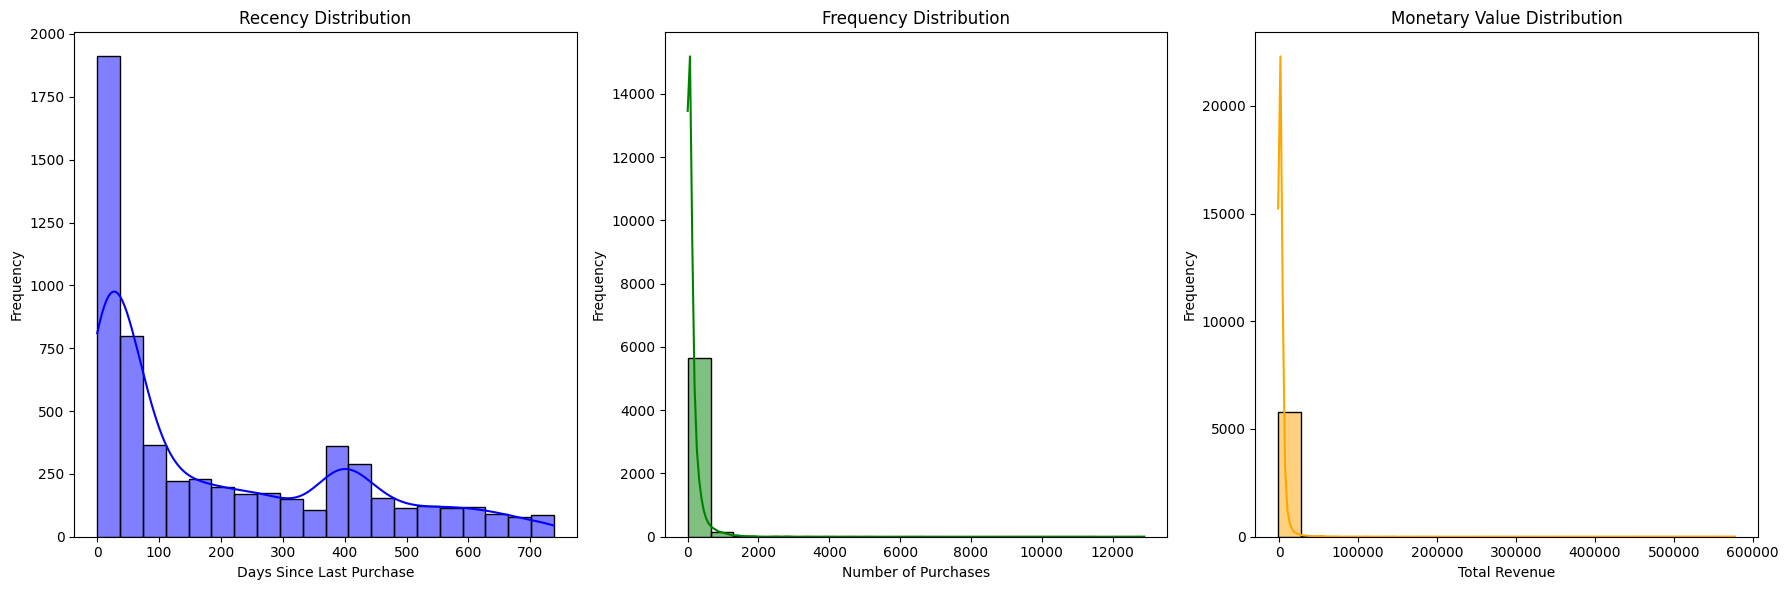

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(18, 6))

# Subplot for Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# Subplot for Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

# Subplot for Monetary Value
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_Sum'], bins=20, kde=True, color='orange')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [173]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Calculate the indices for the splits
n = len(data)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.2 * n)  # Next 20% for y_train and X_test

# Split the data sequentially
train_data = data.iloc[:train_size]  # First 70% for X_train
validation_data = data.iloc[train_size:train_size + validation_size]  # Next 20% for y_train and X_test
test_data = data.iloc[train_size + validation_size:]  # Remaining 10% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(565768, 9)
(161648, 9)
(80824, 9)


In [174]:
test_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
727416,574025,22608,PENS ASSORTED FUNKY JEWELED,72,2011-11-02 12:26:00,0.19,12748.0,United Kingdom,13.68
727417,574025,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,144,2011-11-02 12:26:00,0.29,12748.0,United Kingdom,41.76
727418,C574027,23380,PACK OF 12 VINTAGE DOILY TISSUES,-24,2011-11-02 12:32:00,0.39,13394.0,United Kingdom,-9.36
727419,C574027,22094,RED RETROSPOT TISSUE BOX,-36,2011-11-02 12:32:00,0.39,13394.0,United Kingdom,-14.04
727420,C574027,84836,ZINC METAL HEART DECORATION,-12,2011-11-02 12:32:00,1.25,13394.0,United Kingdom,-15.00
...,...,...,...,...,...,...,...,...,...
808235,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
808236,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
808237,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
808238,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [175]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [176]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 20% (rfm_validation)

In [177]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 10% (rfm_test)

In [178]:
# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [179]:
# Predict the Monetary_Sum for the test dataset
y_pred = rf_model.predict(X_test)

In [180]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 505.61358462845146
RMSE: 1388.797198667797
R-squared: -0.3290610283180826


In [181]:
# Adding predictions to the test set DataFrame
rfm_test['Predicted_Monetary_Sum'] = y_pred

In [182]:
rfm_test

,Customer ID,Recency,Frequency,Monetary_Sum,Predicted_Monetary_Sum
0,13085.0,37.0,0.0,0.00,558.442583
1,13078.0,0.0,51.0,2759.43,925.390465
2,15362.0,37.0,0.0,0.00,414.882190
3,18102.0,0.0,70.0,26816.62,930.903900
4,12682.0,3.0,92.0,2236.62,1893.273175
...,...,...,...,...,...
5850,15195.0,2.0,1.0,3861.00,414.882190
5851,13436.0,1.0,12.0,196.89,414.882190
5852,15520.0,1.0,18.0,343.50,414.882190
5853,13298.0,0.0,2.0,360.00,414.882190


### Base model without c2....

In [183]:
dataw = data[data['StockCode'] != 'C2']

In [184]:
dataw = dataw[dataw['Description'] != 'Next Day Carriage']

In [185]:
#dataw = dataw[dataw['Description'] != 'POSTAGE']

In [186]:
dataw = dataw[dataw['StockCode'] != 'DOT']

In [187]:
dataw.shape

(807890, 9)

In [188]:
# Drop duplicates from the DataFrame
dataw = dataw.drop_duplicates()

In [189]:
dataw.shape

(796225, 9)

In [200]:
# Reindex the data (reset the index)
dataw = dataw.reset_index(drop=True)

In [201]:
dataw

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
796220,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
796221,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
796222,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
796223,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [204]:
rfm = calculate_rfm_features(dataw,all_customers)

In [205]:
rfm

,Customer ID,Recency,Frequency,Monetary_Sum
0,13085.0,157.0,91.0,2289.58
1,13078.0,0.0,845.0,28369.44
2,15362.0,448.0,40.0,613.08
3,18102.0,0.0,1047.0,577180.22
4,12682.0,3.0,992.0,22862.12
...,...,...,...,...
5850,15195.0,2.0,1.0,3861.00
5851,13436.0,1.0,12.0,196.89
5852,15520.0,1.0,18.0,343.50
5853,13298.0,0.0,2.0,360.00


In [206]:
rfm[rfm["Monetary_Sum"]<0]

,Customer ID,Recency,Frequency,Monetary_Sum
554,13091.0,20.0,121.0,-1.343240e+03
600,15935.0,238.0,33.0,-2.007800e+02
605,13112.0,540.0,5.0,-5.440000e+00
3915,14213.0,371.0,10.0,-1.421085e-14


In [207]:
rfm[rfm["Customer ID"]==12347]

,Customer ID,Recency,Frequency,Monetary_Sum
3923,12347.0,1.0,222.0,4921.53


In [208]:
rfm[rfm["Frequency"]<0]

,Customer ID,Recency,Frequency,Monetary_Sum


In [209]:
rfm.isna().sum()

Customer ID     0
Recency         0
Frequency       0
Monetary_Sum    0
dtype: int64

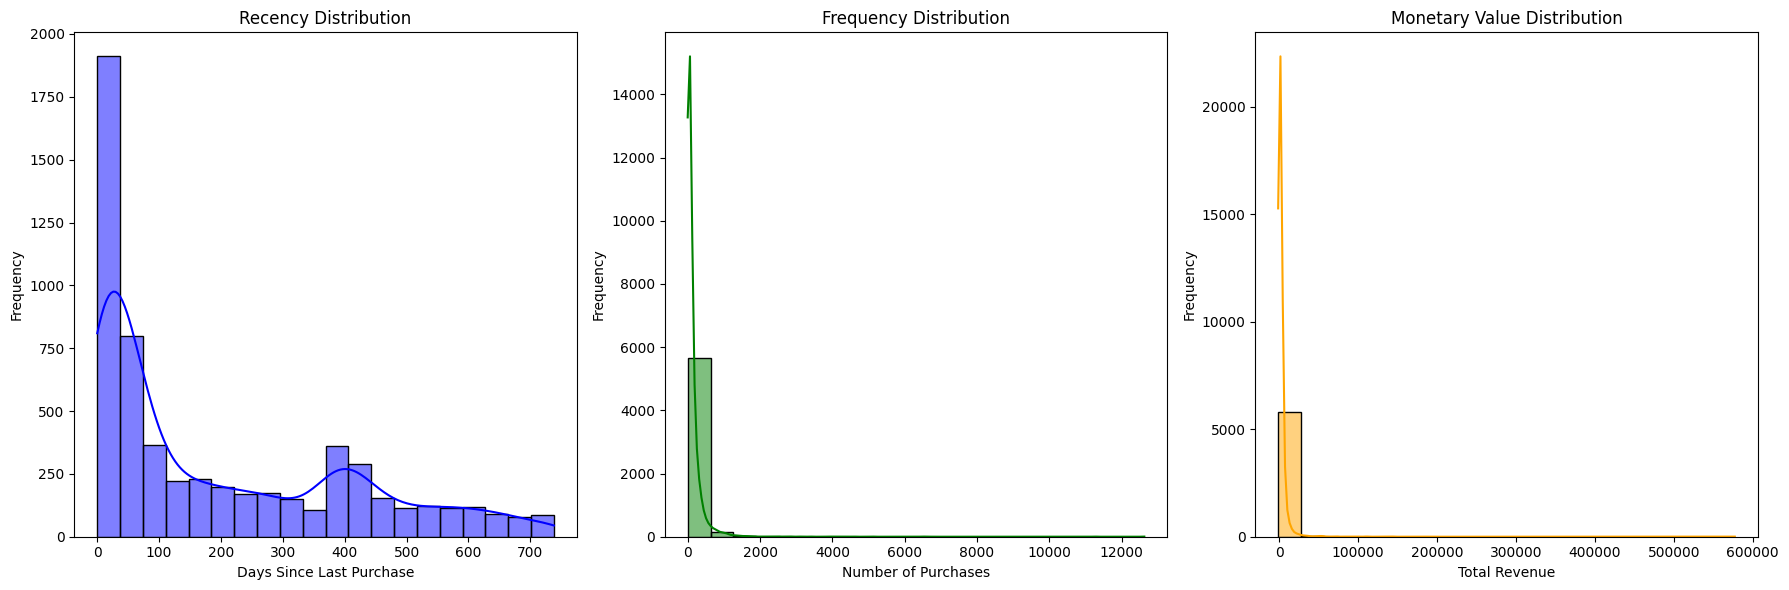

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(18, 6))

# Subplot for Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# Subplot for Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

# Subplot for Monetary Value
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_Sum'], bins=20, kde=True, color='orange')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [211]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Calculate the indices for the splits
n = len(dataw)
train_size = int(0.7 * n)  # First 70% of data for X_train
validation_size = int(0.2 * n)  # Next 20% for y_train and X_test

# Split the data sequentially
train_data = dataw.iloc[:train_size]  # First 70% for X_train
validation_data = dataw.iloc[train_size:train_size + validation_size]  # Next 20% for y_train and X_test
test_data = dataw.iloc[train_size + validation_size:]  # Remaining 10% for y_test

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(557357, 9)
(159245, 9)
(79623, 9)


In [212]:
test_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
716602,573931,23570,TRADITIONAL PICK UP STICKS GAME,12,2011-11-02 10:16:00,1.25,16884.0,United Kingdom,15.00
716603,573931,23569,TRADTIONAL ALPHABET STAMP SET,4,2011-11-02 10:16:00,4.95,16884.0,United Kingdom,19.80
716604,573931,23084,RABBIT NIGHT LIGHT,12,2011-11-02 10:16:00,2.08,16884.0,United Kingdom,24.96
716605,573931,22644,CERAMIC CHERRY CAKE MONEY BANK,12,2011-11-02 10:16:00,1.45,16884.0,United Kingdom,17.40
716606,573931,23078,ICE CREAM PEN LIP GLOSS,24,2011-11-02 10:16:00,1.25,16884.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
796220,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
796221,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
796222,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
796223,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [213]:
# Calculate RFM features for train, validation, and test sets
rfm_train = calculate_rfm_features(train_data, all_customers)
rfm_validation = calculate_rfm_features(validation_data, all_customers)
rfm_test = calculate_rfm_features(test_data, all_customers)

In [214]:
# Prepare X_train and y_train
X_train = rfm_train.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from first 70% (rfm_train)
y_train = rfm_validation['Monetary_Sum']  # Target from next 20% (rfm_validation)

In [215]:
# Prepare X_test and y_test
X_test = rfm_validation.drop(['Monetary_Sum', 'Customer ID'], axis=1)  # Features from next 20% (rfm_validation)
y_test = rfm_test['Monetary_Sum']  # Target from last 10% (rfm_test)

In [216]:
# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [217]:
# Predict the Monetary_Sum for the test dataset
y_pred = rf_model.predict(X_test)

In [218]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 517.8113925597481
RMSE: 1413.2434700508354
R-squared: -0.4624857892172547


In [219]:
# Adding predictions to the test set DataFrame
rfm_test['Predicted_Monetary_Sum'] = y_pred

In [220]:
rfm_test

,Customer ID,Recency,Frequency,Monetary_Sum,Predicted_Monetary_Sum
0,13085.0,37.0,0.0,0.00,355.982517
1,13078.0,0.0,51.0,2759.43,999.178200
2,15362.0,37.0,0.0,0.00,447.767355
3,18102.0,0.0,70.0,26816.62,926.657100
4,12682.0,3.0,91.0,2228.22,1033.613100
...,...,...,...,...,...
5850,15195.0,2.0,1.0,3861.00,447.767355
5851,13436.0,1.0,12.0,196.89,447.767355
5852,15520.0,1.0,18.0,343.50,447.767355
5853,13298.0,0.0,2.0,360.00,447.767355
